In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aaamlp/adult.csv
/kaggle/input/aaamlp/mnist_test.csv
/kaggle/input/aaamlp/mobile_train.csv
/kaggle/input/aaamlp/cat_test.csv
/kaggle/input/aaamlp/cat_train_folds.csv
/kaggle/input/aaamlp/mnist_train_folds.csv
/kaggle/input/aaamlp/cat_train.csv
/kaggle/input/aaamlp/mnist_train.csv
/kaggle/input/aaamlp/winequality-red.csv
/kaggle/input/aaamlp/imdb_folds.csv
/kaggle/input/aaamlp/adult_folds.csv
/kaggle/input/aaamlp/imdb.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [ ]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [ ]:
pixel_values

In [ ]:
single_image = pixel_values.iloc[5, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [ ]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [ ]:
tsne_df

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/aaamlp/winequality-red.csv")

In [ ]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [ ]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

In [ ]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [ ]:
train_accuracy, test_accuracy

In [ ]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
# init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
# columns/features for training
# note that, this can be done outside
# the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]
# fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
# create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
# calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
# append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()


In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a CSV file called train.csv
    df = pd.read_csv("/kaggle/input/aaamlp/winequality-red.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
# the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
# fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

In [ ]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a csv file called train.csv
    df = pd.read_csv("/kaggle/input/aaamlp/winequality-red.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
# the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
# fetch targets
    y = df.quality.values
# initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
# save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)


In [ ]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
def create_folds(data):
# we create a new column called kfold and fill it with -1
    data["kfold"] = -1
# the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
# calculate the number of bins by Sturge's rule
# I take the floor of the value, you can also
# just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
# bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
# initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
# note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
# drop the bins column
    data = data.drop("bins", axis=1)
# return dataframe with folds
    return data
if __name__ == "__main__":
# we create a sample dataset with 15000 samples
# and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
    )
# create a dataframe out of our numpy arrays
    df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
# create folds
    df = create_folds(df)

In [ ]:
df

In [ ]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
# initialize a simple counter for correct predictions
    correct_counter = 0
# loop over all elements of y_true
# and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
# if prediction is equal to truth, increase the counter
            correct_counter += 1
# return accuracy
# which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [ ]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2), accuracy(l1, l2)

In [ ]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
true_positive(l1, l2), false_positive(l1, l2), false_negative(l1, l2), true_negative(l1, l2)


In [ ]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [ ]:
accuracy_v2(l1, l2)

In [ ]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [ ]:
precision(l1, l2)

In [ ]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [ ]:
recall(l1, l2)

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
            0.0490937, 0.0191491, 0.17554844,
            0.15952202, 0.03819563, 0.11639273,
            0.079377, 0.08584789, 0.39095342,
            0.27259048, 0.03447096, 0.04644807,
            0.03543574, 0.18521942, 0.05934905,
            0.61977213, 0.33056815]

In [ ]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
            0.08584789, 0.11114267, 0.11639273,
            0.15952202, 0.17554844, 0.18521942,
            0.27259048, 0.31620708, 0.33056815,
            0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [ ]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

In [ ]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

In [ ]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

In [ ]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [ ]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [ ]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [ ]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
        0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

In [ ]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
        0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
            0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [ ]:
import numpy as np
def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

In [ ]:
y_true = [0, 0, 0, 0, 1, 0, 1,
            0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
            0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
            0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

In [ ]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

In [ ]:
import numpy as np
def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        # keep adding precision for all classes
        precision += temp_precision
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [ ]:
import numpy as np
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [ ]:
from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [ ]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
print(macro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="macro"))
print(micro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="micro"))
print(weighted_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="weighted"))


In [ ]:
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
    # calculate overall F1 by dividing by
    # total number of samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [ ]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [ ]:
weighted_f1(y_true, y_pred)

In [ ]:
metrics.f1_score(y_true, y_pred, average="weighted")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

In [ ]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """
    # if k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    # convert predictions to set
    pred_set = set(y_pred)
    # convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

In [ ]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [ ]:
y_true = [
[1, 2, 3],
[0, 2],
[1],
[2, 3],
[1, 0],
[]]

y_pred = [
[0, 1, 2],
[1],
[0, 2, 3],
[2, 3, 4, 0],
[0, 1, 2],
[0]]

In [ ]:
for i in range(len(y_true)):
    for j in range(1, 4):
        print(

        f"""
        y_true={y_true[i]},
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """
        )

In [ ]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
    # store apk values for every sample
        apk_values.append(
        apk(y_true[i], y_pred[i], k=k)
    )
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [ ]:
mapk(y_true, y_pred, k=1)

In [ ]:
# taken from:
# https://github.com/benhamner/Metrics/blob/
# master/Python/ml_metrics/average_precision.py
import numpy as np
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the AP at k between two lists of
    items.
    Parameters
    ----------
    actual : list
    A list of elements to be predicted (order doesn't matter)
    predicted : list
    A list of predicted elements (order does matter)
    k : int, optional
    The maximum number of predicted elements
    Returns
    -------
    score : double
    The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

In [ ]:
import numpy as np
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0
    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
    # calculate the ratio
    ratio = numerator / denominator
    # return 1 - ratio
    return (1 - ratio)

In [ ]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
    }

import pandas as pd
df = pd.read_csv("/kaggle/input/aaamlp/cat_train.csv")
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

In [ ]:
df

In [ ]:
df.ord_2.value_counts()

In [ ]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv("/kaggle/input/aaamlp/cat_train.csv")
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

In [ ]:
import numpy as np
# create our example feature matrix
example = np.array(
[
[0, 0, 1],
[1, 0, 0],
[1, 0, 1]
]
)
# print size in bytes
print(example.nbytes)

In [ ]:
import numpy as np
from scipy import sparse
# create our example feature matrix
example = np.array(
[
[0, 0, 1],
[1, 0, 0],
[1, 0, 1]
]
)
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)

In [ ]:
print(
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)

In [ ]:
sparse_example.indptr

In [ ]:
# number of rows
n_rows = 10000
# number of columns
n_cols = 100000
# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

In [ ]:
import numpy as np
from scipy import sparse
# create binary matrix
example = np.array(
[
[0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]
]
)
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

In [ ]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

In [ ]:
df = pd.read_csv("/kaggle/input/aaamlp/cat_train.csv")
df[df.ord_2 == "Boiling Hot"].shape

In [ ]:
df.groupby(["ord_2"])['id'].count()

In [ ]:
df['ord_2'].value_counts()

In [ ]:
df.groupby(["ord_2"])["id"].transform("count")

In [ ]:
df.groupby(
[
"ord_1",
"ord_2"
])["id"].count().reset_index(name="count")

In [ ]:
df["new_feature"] = (
df.ord_1.astype(str)
+ "_"
+ df.ord_2.astype(str)
)

In [ ]:
df["new_feature"].nunique()

In [ ]:
df.ord_2.fillna("NONE").value_counts()

In [ ]:
import pandas as pd
from sklearn import preprocessing
# read training data
train = pd.read_csv("/kaggle/input/aaamlp/cat_train.csv")
#read test data
test = pd.read_csv("/kaggle/input/aaamlp/cat_train.csv")
# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1
# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)
# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]
# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [ ]:
df.ord_4.fillna("NONE").value_counts()

In [ ]:
df.ord_4 = df.ord_4.fillna("NONE")
df.loc[df["ord_4"].value_counts()[df["ord_4"]].values < 2000,"ord_4"] = "RARE"
df.ord_4.value_counts()

In [ ]:
import pandas as pd
# create a series of datetime with a frequency of 10 hours
s = pd.date_range('2020-01-06', '2020-01-10', freq='10H').to_series()
# create some features based on datetime
features = {
    "dayofweek": s.dt.dayofweek.values,
    "dayofyear": s.dt.dayofyear.values,
    "hour": s.dt.hour.values,
    "is_leap_year": s.dt.is_leap_year.values,
    "quarter": s.dt.quarter.values,
    "weekofyear": s.dt.weekofyear.values
}

In [ ]:
def generate_features(df):
    # create a bunch of features using the date column
    df.loc[:, 'year'] = df['date'].dt.year
    df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear
    df.loc[:, 'month'] = df['date'].dt.month
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
    df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int)
    # create an aggregate dictionary
    aggs = {}
    # for aggregation by month, we calculate the
    # number of unique month values and also the mean
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']
    # we aggregate by num1 and calculate sum, max, min
    # and mean values of this column
    aggs['num1'] = ['sum','max','min','mean']
    # for customer_id, we calculate the total count
    aggs['customer_id'] = ['size']
    # again for customer_id, we calculate the total unique
    aggs['customer_id'] = ['nunique']
    # we group by customer_id and calculate the aggregates
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df


In [ ]:
import numpy as np
feature_dict = {}
# calculate mean
feature_dict['mean'] = np.mean(x)
# calculate max
feature_dict['max'] = np.max(x)
# calculate min
feature_dict['min'] = np.min(x)
# calculate standard deviation
feature_dict['std'] = np.std(x)
# calculate variance
feature_dict['var'] = np.var(x)
# peak-to-peak
feature_dict['ptp'] = np.ptp(x)
# percentile features
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)
# quantile features
feature_dict['quantile_5'] = np.quantile(x, 0.05)
feature_dict['quantile_95'] = np.quantile(x, 0.95)
feature_dict['quantile_99'] = np.quantile(x, 0.99)


In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc
# tsfresh based features
feature_dict['abs_energy'] = fc.abs_energy(x)
feature_dict['count_above_mean'] = fc.count_above_mean(x)
feature_dict['count_below_mean'] = fc.count_below_mean(x)
feature_dict['mean_abs_change'] = fc.mean_abs_change(x)
feature_dict['mean_change'] = fc.mean_change(x)

In [ ]:
import numpy as np
# generate a random dataframe with
# 2 columns and 100 rows
df = pd.DataFrame(
np.random.rand(100, 2),
columns=[f"f_{i}" for i in range(1, 3)]
)

In [ ]:
from sklearn import preprocessing
# initialize polynomial features class object
# for two-degree polynomial features
pf = preprocessing.PolynomialFeatures(
degree=2,
interaction_only=False,
include_bias=False
)
# fit to the features
pf.fit(df)
# create polynomial features
poly_feats = pf.transform(df)
# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
poly_feats,
columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

In [ ]:
# create bins of the numerical columns
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 100 bins
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)

In [ ]:
df_transformed.f_14.var()

In [ ]:
df_transformed.f_14.apply(lambda x: np.log(1 + x)).var()

In [ ]:
import numpy as np
from sklearn import impute
# create a random numpy array with 10 samples
# and 6 features and values ranging from 1 to 15
X = np.random.randint(1, 15, (10, 6))
# convert the array to float
X = X.astype(float)
# randomly assign 10 elements to NaN (missing)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
# use 2 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

In [ ]:
X

In [ ]:
from sklearn.feature_selection import VarianceThreshold
data = df
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transformed data will have all columns with variance less
# than 0.1 removed

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
# get correlation matrix (pearson)
df.corr()

In [ ]:
X

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile


class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on
        different univariate feature selection models from
        scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        # for a given problem type, there are only
        # a few valid scoring methods
        # you can extend this with your own custom
        # methods if you wish
        if problem_type == "classification":
            valid_scoring = {
            "f_classif": f_classif,
            "chi2": chi2,
            "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
            "f_regression": f_regression,
            "mutual_info_regression": mutual_info_regression
            }
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(
            valid_scoring[scoring],
            k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
            valid_scoring[scoring],
            percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")
    
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)


In [ ]:
ufs = UnivariateFeatureSelction(
    n_features=5,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X, y)
X_transformed = ufs.transform(X)

In [ ]:
X_transformed

In [ ]:
# greedy.py
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification
class GreedyFeatureSelection:
    """
    A simple and custom class for greedy feature selection.
    You will need to modify it quite a bit to make it suitable
    for your dataset.
    """
    def evaluate_score(self, X, y):
        """
        This function evaluates model on data and returns
        Area Under ROC Curve (AUC)
        NOTE: We fit the data and calculate AUC on same data.
        WE ARE OVERFITTING HERE.
        But this is also a way to achieve greedy selection.
        k-fold will take k times longer.
        If you want to implement it in really correct way,
        calculate OOF AUC and return mean AUC over k folds.
        This requires only a few lines of change and has been
        shown a few times in this book.
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        # fit the logistic regression model,
        # and calculate AUC on same data
        # again: BEWARE
        # you can choose any model that suits your data
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc
    
    def _feature_selection(self, X, y):
        """
        This function does the actual greedy selection
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best scores, best features)
        """
        # initialize good features list
        # and best scores to keep track of both
        good_features = []
        best_scores = []
        # calculate the number of features
        num_features = X.shape[1]
        # infinite loop
        while True:
            # initialize best feature and score of this loop
            this_feature = None
            best_score = 0
            # loop over all features
            for feature in range(num_features):
                # if feature is already in good features,
                # skip this for loop
                if feature in good_features:
                    continue
                # selected features are all good features till now
                # and current feature
                selected_features = good_features + [feature]
                # remove all other features from data
                xtrain = X[:, selected_features]
                # calculate the score, in our case, AUC
                score = self.evaluate_score(xtrain, y)
                # if score is greater than the best score
                # of this loop, change best score and best feature
                if score > best_score:
                    this_feature = feature
                    best_score = score
            # if we have selected a feature, add it
            # to the good feature list and update best scores list
            if this_feature != None:
                good_features.append(this_feature)
                best_scores.append(best_score)
            # if we didnt improve during the previous round,
            # exit the while loop
            if len(best_scores) > 2:
                if best_scores[-1] < best_scores[-2]:
                    break
        # return best scores and good features
        # why do we remove the last data point?
        return best_scores[:-1], good_features[:-1]
    
    def __call__(self, X, y):
        """
        Call function will call the class on a set of arguments
        """
        # select features, return scores and selected indices
        scores, features = self._feature_selection(X, y)
        # transform data with selected features
        return X[:, features], scores



In [ ]:
if __name__ == "__main__":
    # generate binary classification data
    X, y = make_classification(n_samples=1000, n_features=100)
    # transform data by greedy feature selection
    X_transformed, scores = GreedyFeatureSelection()(X, y)

In [ ]:
X.shape

In [ ]:
X_transformed.shape

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE(
estimator=model,
n_features_to_select=3
)
# fit RFE
rfe.fit(X, y)
# get the transformed data with
# selected columns
X_transformed = rfe.transform(X)

In [ ]:
X_transformed

In [ ]:
X

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

In [ ]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)
# see which features were selected
support = sfm.get_support()
# get feature names
print([
    x for x, y in zip(col_names, support) if y == True
])

['bmi', 's5']


In [7]:
# rf_grid_search.py
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("/kaggle/input/aaamlp/mobile_train.csv")
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define the model here
    # i am using random forest with n_jobs=-1
    # n_jobs=-1 => use all cores
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    # define a grid of parameters
    # this can be a dictionary or a list of
    # dictionaries
    param_grid = {
        "n_estimators": [100, 200, 250, 300, 400, 500],
        "max_depth": [1, 2, 5, 7, 11, 15],
        "criterion": ["gini", "entropy"]
    }
    # initialize grid search
    # estimator is the model that we have defined
    # param_grid is the grid of parameters
    # we use accuracy as our metric. you can define your own
    # higher value of verbose implies a lot of details are printed
    # cv=5 means that we are using 5 fold cv (not stratified)
    model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5
    )
    # fit the model and extract best score
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   2.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.3s
[CV 3/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.4s
[CV 4/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.4s
[CV 5/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100; total time=   0.4s
[CV 1/5; 2/72] START criterion=gini, max_depth=1, n_estimators=200..............
[CV 1/5; 2/72] END criterio

In [9]:
# rf_randomized_search.py
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("/kaggle/input/aaamlp/mobile_train.csv")
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define the model here
    # i am using random forest with n_jobs=-1
    # n_jobs=-1 => use all cores
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    # define a grid of parameters
    # this can be a dictionary or a list of
    # dictionaries
    param_grid = {
        "n_estimators": np.arange(100, 1500, 100),
        "max_depth": np.arange(1, 31),
        "criterion": ["gini", "entropy"]
    }
    # initialize grid search
    # estimator is the model that we have defined
    # param_grid is the grid of parameters
    # we use accuracy as our metric. you can define your own
    # higher value of verbose implies a lot of details are printed
    # cv=5 means that we are using 5 fold cv (not stratified)
    model = model_selection.RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5
    )
    # fit the model and extract best score
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=5, n_estimators=300...........
[CV 1/5; 1/10] END criterion=entropy, max_depth=5, n_estimators=300; total time=   0.9s
[CV 2/5; 1/10] START criterion=entropy, max_depth=5, n_estimators=300...........
[CV 2/5; 1/10] END criterion=entropy, max_depth=5, n_estimators=300; total time=   1.0s
[CV 3/5; 1/10] START criterion=entropy, max_depth=5, n_estimators=300...........
[CV 3/5; 1/10] END criterion=entropy, max_depth=5, n_estimators=300; total time=   1.0s
[CV 4/5; 1/10] START criterion=entropy, max_depth=5, n_estimators=300...........
[CV 4/5; 1/10] END criterion=entropy, max_depth=5, n_estimators=300; total time=   0.9s
[CV 5/5; 1/10] START criterion=entropy, max_depth=5, n_estimators=300...........
[CV 5/5; 1/10] END criterion=entropy, max_depth=5, n_estimators=300; total time=   1.0s
[CV 1/5; 2/10] START criterion=gini, max_depth=13, n_estimators=400.............
[CV 1/5; 2/10

In [11]:
# rf_gp_minimize.py
import numpy as np
import pandas as pd
from functools import partial
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from skopt import gp_minimize
from skopt import space

def optimize(params, param_names, x, y):
    """
    The main optimization function.
    This function takes all the arguments from the search space
    and training features and targets. It then initializes
    the models by setting the chosen parameters and runs
    cross-validation and returns a negative accuracy score
    :param params: list of params from gp_minimize
    :param param_names: list of param names. order is important!
    :param x: training data
    :param y: labels/targets
    :return: negative accuracy after 5 folds
    """
    # convert params to dictionary
    params = dict(zip(param_names, params))
    # initialize model with current parameters
    model = ensemble.RandomForestClassifier(**params)
    # initialize stratified k-fold
    kf = model_selection.StratifiedKFold(n_splits=5)
    # initialize accuracy list
    accuracies = []
    # loop over all folds
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        # fit model for current fold
        model.fit(xtrain, ytrain)
        #create predictions
        preds = model.predict(xtest)
        # calculate and append accuracy
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        accuracies.append(fold_accuracy)
    # return negative accuracy
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("../input/aaamlp/mobile_train.csv")
    #features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define a parameter space
    param_space = [
        # max_depth is an integer between 3 and 10
        space.Integer(3, 15, name="max_depth"),
        # n_estimators is an integer between 50 and 1500
        space.Integer(100, 1500, name="n_estimators"),
        # criterion is a category. here we define list of categories
        space.Categorical(["gini", "entropy"], name="criterion"),
        # you can also have Real numbered space and define a
        # distribution you want to pick it from
        space.Real(0.01, 1, prior="uniform", name="max_features")
    ]
    # make a list of param names
    # this has to be same order as the search space
    # inside the main function
    param_names = [
        "max_depth",
        "n_estimators",
        "criterion",
        "max_features"
        ]
    # by using functools partial, i am creating a
    # new function which has same parameters as the
    # optimize function except for the fact that
    # only one param, i.e. the "params" parameter is
    # required. this is how gp_minimize expects the
    # optimization function to be. you can get rid of this
    # by reading data inside the optimize function or by
    # defining the optimize function here.
    optimization_function = partial(
        optimize,
        param_names=param_names,
        x=X,
        y=y
    )
    # now we call gp_minimize from scikit-optimize
    # gp_minimize uses bayesian optimization for
    # minimization of the optimization function.
    # we need a space of parameters, the function itself,
    # the number of calls/iterations we want to have
    result = gp_minimize(
        optimization_function,
        dimensions=param_space,
        n_calls=15,
        n_random_starts=10,
        verbose=10
    )
    # create best params dict and print it
    best_params = dict(
    zip(
        param_names,
        result.x
    )
    )
    print(best_params)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.2940
Function value obtained: -0.8915
Current minimum: -0.8915
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.4797
Function value obtained: -0.8545
Current minimum: -0.8915
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 29.0873
Function value obtained: -0.8320
Current minimum: -0.8915
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 45.7923
Function value obtained: -0.8880
Current minimum: -0.8915
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 24.7324
Function value obtained: -0.8275
Current minimum: -0.8915
Iteration No: 6 starte

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

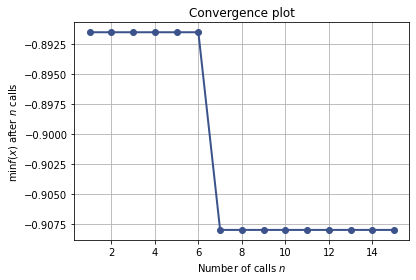

In [13]:
from skopt.plots import plot_convergence
plot_convergence(result)

In [15]:
# rf_hyperopt.py
import numpy as np
import pandas as pd
from functools import partial
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

def optimize(params, x, y):
    """
    The main optimization function.
    This function takes all the arguments from the search space
    and training features and targets. It then initializes
    the models by setting the chosen parameters and runs
    cross-validation and returns a negative accuracy score
    :param params: list of params from gp_minimize
    :param param_names: list of param names. order is important!
    :param x: training data
    :param y: labels/targets
    :return: negative accuracy after 5 folds
    """
    
    # initialize model with current parameters
    model = ensemble.RandomForestClassifier(**params)
    # initialize stratified k-fold
    kf = model_selection.StratifiedKFold(n_splits=5)
    # initialize accuracy list
    accuracies = []
    # loop over all folds
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        # fit model for current fold
        model.fit(xtrain, ytrain)
        #create predictions
        preds = model.predict(xtest)
        # calculate and append accuracy
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        accuracies.append(fold_accuracy)
    # return negative accuracy
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("../input/aaamlp/mobile_train.csv")

    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define a parameter space
    # now we use hyperopt
    param_space = {
        # quniform gives round(uniform(low, high) / q) * q
        # we want int values for depth and estimators
        "max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
        "n_estimators": scope.int(
        hp.quniform("n_estimators", 100, 1500, 1)
        ),
        # choice chooses from a list of values
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        # uniform chooses a value between two values
        "max_features": hp.uniform("max_features", 0, 1)
    }
    # partial function
    optimization_function = partial(
        optimize,
        x=X,
        y=y
    )
    # initialize trials to keep logging information
    trials = Trials()
    # run hyperopt
    hopt = fmin(
        fn=optimization_function,
        space=param_space,
        algo=tpe.suggest,
        max_evals=15,
        trials=trials
    )
    print(hopt)

100%|██████████| 15/15 [05:55<00:00, 23.73s/trial, best loss: -0.909]            
{'criterion': 1, 'max_depth': 14.0, 'max_features': 0.7716461340431485, 'n_estimators': 558.0}
